# Plant Disease Prediction

## Importing Dataset

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image preprocessing

In [7]:
training_set = tf.keras.utils.image_dataset_from_directory(
     r'F:\Thapar\Semester 5\Projects\Plant_Disease\Plant_Disease_Dataset\train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 8661 files belonging to 38 classes.


### Validation Image Preprocessing

In [8]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    r'F:\Thapar\Semester 5\Projects\Plant_Disease\Plant_Disease_Dataset\valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2246 files belonging to 38 classes.


#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [9]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

c:\Users\sarda\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [14]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [15]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [16]:
cnn.add(tf.keras.layers.Flatten())

In [17]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [18]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [19]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

### Compiling and Training Phase

In [20]:
import tensorflow as tf

cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [21]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=6)

Epoch 1/6
271/271 ━━━━━━━━━━━━━━━━━━━━ 149s 541ms/step - accuracy: 0.0675 - loss: 3.5250 - val_accuracy: 0.2796 - val_loss: 2.5682
Epoch 2/6
271/271 ━━━━━━━━━━━━━━━━━━━━ 150s 555ms/step - accuracy: 0.3343 - loss: 2.3328 - val_accuracy: 0.4795 - val_loss: 1.7806
Epoch 3/6
271/271 ━━━━━━━━━━━━━━━━━━━━ 156s 575ms/step - accuracy: 0.4923 - loss: 1.6922 - val_accuracy: 0.6273 - val_loss: 1.2422
Epoch 4/6
271/271 ━━━━━━━━━━━━━━━━━━━━ 150s 554ms/step - accuracy: 0.6242 - loss: 1.2346 - val_accuracy: 0.6790 - val_loss: 1.0425
Epoch 5/6
271/271 ━━━━━━━━━━━━━━━━━━━━ 158s 583ms/step - accuracy: 0.7095 - loss: 0.9624 - val_accuracy: 0.7297 - val_loss: 0.9245
Epoch 6/6
271/271 ━━━━━━━━━━━━━━━━━━━━ 161s 595ms/step - accuracy: 0.7598 - loss: 0.7655 - val_accuracy: 0.7507 - val_loss: 0.8463


## Evaluating Model

In [23]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

271/271 ━━━━━━━━━━━━━━━━━━━━ 47s 172ms/step - accuracy: 0.8523 - loss: 0.4859
Training accuracy: 0.8680291175842285


In [24]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

71/71 ━━━━━━━━━━━━━━━━━━━━ 12s 169ms/step - accuracy: 0.7535 - loss: 0.8130
Validation accuracy: 0.7506678700447083


### Saving Model

In [25]:
cnn.save('trained_plant_disease_model.keras')

In [26]:
training_history.history 

{'accuracy': [0.1273525059223175,
  0.39729824662208557,
  0.5390832424163818,
  0.6532732844352722,
  0.7224339246749878,
  0.7776238322257996],
 'loss': [3.24023175239563,
  2.08073091506958,
  1.5230735540390015,
  1.1322797536849976,
  0.9038163423538208,
  0.7090080976486206],
 'val_accuracy': [0.27960819005966187,
  0.47951915860176086,
  0.6273375153541565,
  0.6789848804473877,
  0.7297417521476746,
  0.7506678700447083],
 'val_loss': [2.568222999572754,
  1.7805920839309692,
  1.2421972751617432,
  1.0424869060516357,
  0.9244553446769714,
  0.8462934494018555]}

In [27]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [28]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Accuracy Visualization

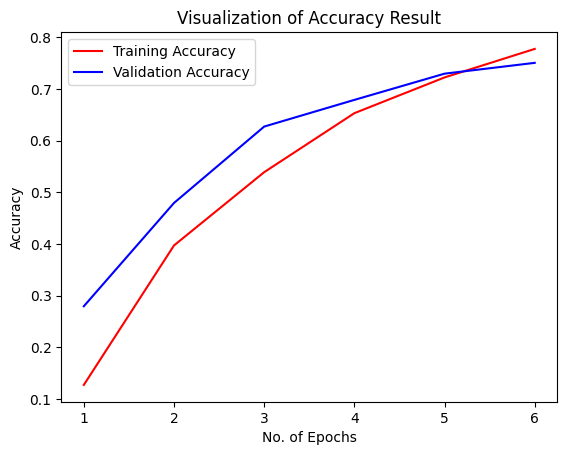

In [29]:
import matplotlib.pyplot as plt

epochs = [i for i in range(1, len(training_history.history['accuracy']) + 1)]
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [30]:
class_name = validation_set.class_names

In [31]:
test_set = tf.keras.utils.image_dataset_from_directory(
    r'F:\Thapar\Semester 5\Projects\Plant_Disease\Plant_Disease_Dataset\valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2246 files belonging to 38 classes.


In [32]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

2246/2246 ━━━━━━━━━━━━━━━━━━━━ 36s 16ms/step


In [33]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [34]:
Y_true

<tf.Tensor: shape=(2246,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [35]:
predicted_categories

<tf.Tensor: shape=(2246,), dtype=int64, numpy=array([ 3, 15,  0, ..., 37, 37, 37], dtype=int64)>

In [36]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [37]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [38]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.79      0.49      0.60        53
                                 Apple___Black_rot       0.74      0.64      0.69        50
                          Apple___Cedar_apple_rust       0.52      0.73      0.61        52
                                   Apple___healthy       0.66      0.60      0.63        55
                               Blueberry___healthy       0.62      0.33      0.43        55
          Cherry_(including_sour)___Powdery_mildew       0.68      0.80      0.73        59
                 Cherry_(including_sour)___healthy       0.54      0.95      0.68        55
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.64      0.93      0.76        55
                       Corn_(maize)___Common_rust_       0.95      0.92      0.93        77
               Corn_(maize)___Northern_Leaf_Blight       0.92      0.75      0.

### Confusion Matrix Visualization

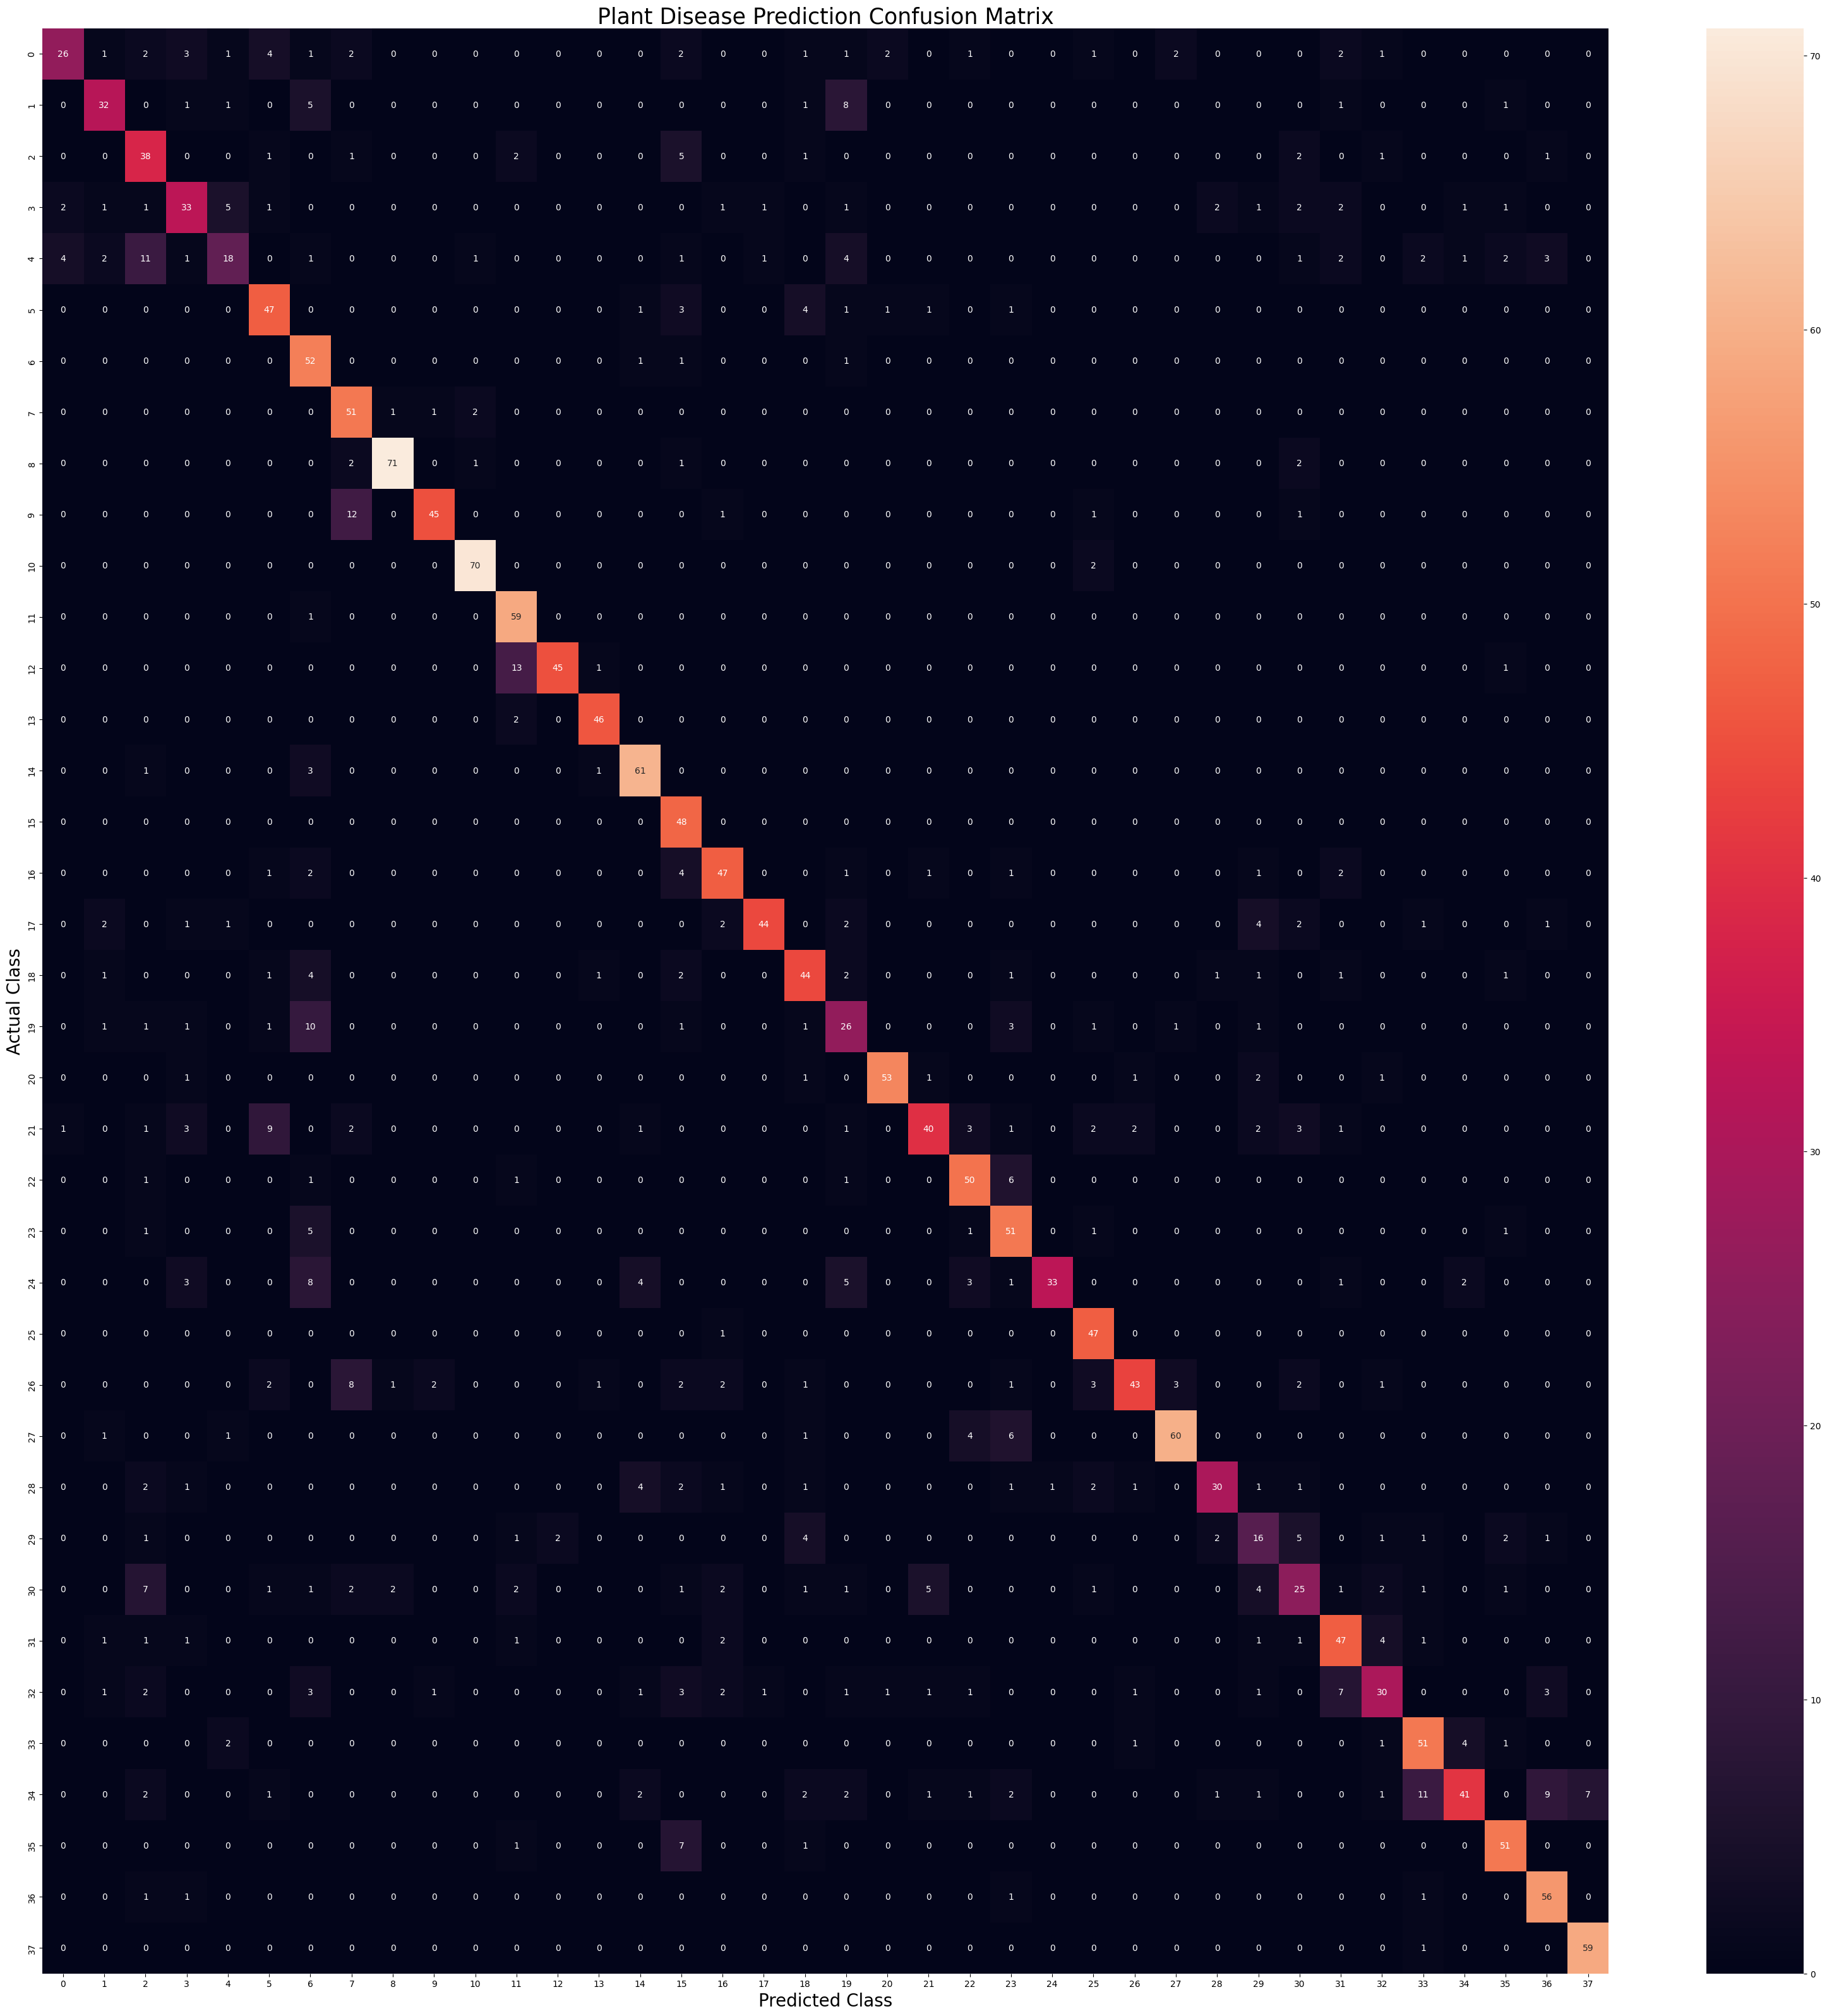

In [39]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 975ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 915ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 935ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 912ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 927ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 925ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 991ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 962ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 976ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 927ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 959ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 948ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

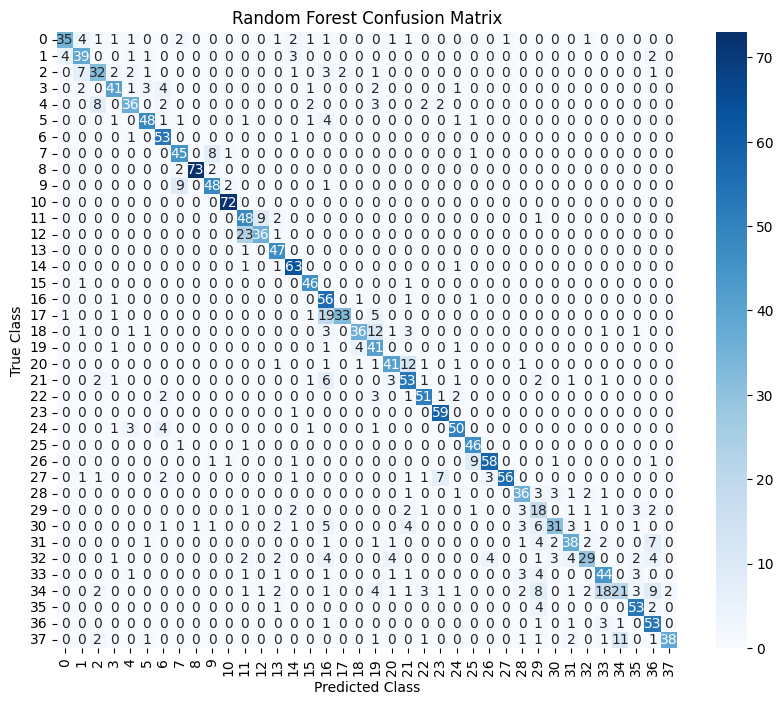

In [ ]:
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

vgg16 = tf.keras.applications.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(128, 128, 3)
)

feature_extractor = tf.keras.models.Model(inputs=vgg16.input, outputs=tf.keras.layers.Flatten()(vgg16.output))

train_features = []
train_labels = []

for images, labels in training_set:
    features = feature_extractor.predict(images)
    train_features.append(features)
    train_labels.append(labels)

train_features = np.vstack(train_features)
train_labels = np.argmax(np.vstack(train_labels), axis=1)  

val_features = []
val_labels = []

for images, labels in validation_set:
    features = feature_extractor.predict(images)
    val_features.append(features)
    val_labels.append(labels)

val_features = np.vstack(val_features)
val_labels = np.argmax(np.vstack(val_labels), axis=1)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(train_features, train_labels)

rf_train_predictions = rf_model.predict(train_features)
rf_train_accuracy = accuracy_score(train_labels, rf_train_predictions)
print(f"Random Forest Training Accuracy: {rf_train_accuracy:.2f}")

rf_val_predictions = rf_model.predict(val_features)
rf_val_accuracy = accuracy_score(val_labels, rf_val_predictions)
print(f"Random Forest Validation Accuracy: {rf_val_accuracy:.2f}")


rf_cm = confusion_matrix(val_labels, rf_val_predictions)
print("\nRandom Forest Classification Report:\n")
print(classification_report(val_labels, rf_val_predictions))

plt.figure(figsize=(10, 8))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()